In [5]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = r"C:\Users\hp1\Downloads\insurance.csv"
data = pd.read_csv(url)

# Display the first few rows of the data
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [7]:
# Data Preprocessing
# Define feature columns and target column
X = data.drop('charges', axis=1)
y = data['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess categorical and numerical columns
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# Preprocessing for numerical data (scaling)
numeric_transformer = StandardScaler()

# Preprocessing for categorical data (one-hot encoding)
categorical_transformer = OneHotEncoder(drop='first')  # Drop first to avoid multicollinearity

In [9]:
# Create a column transformer for applying transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a pipeline for both Linear Regression and Random Forest
linear_regression_model = Pipeline(steps=[('preprocessor', preprocessor),
                                          ('regressor', LinearRegression())])

random_forest_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

In [11]:
# Train both models
linear_regression_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = linear_regression_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

In [13]:
# Evaluate models
print("Linear Regression Model")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.2f}\n")

print("Random Forest Model")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.2f}\n")



Linear Regression Model
Mean Squared Error (MSE): 33596915.85
R² Score: 0.78

Random Forest Model
Mean Squared Error (MSE): 20864569.51
R² Score: 0.87



<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

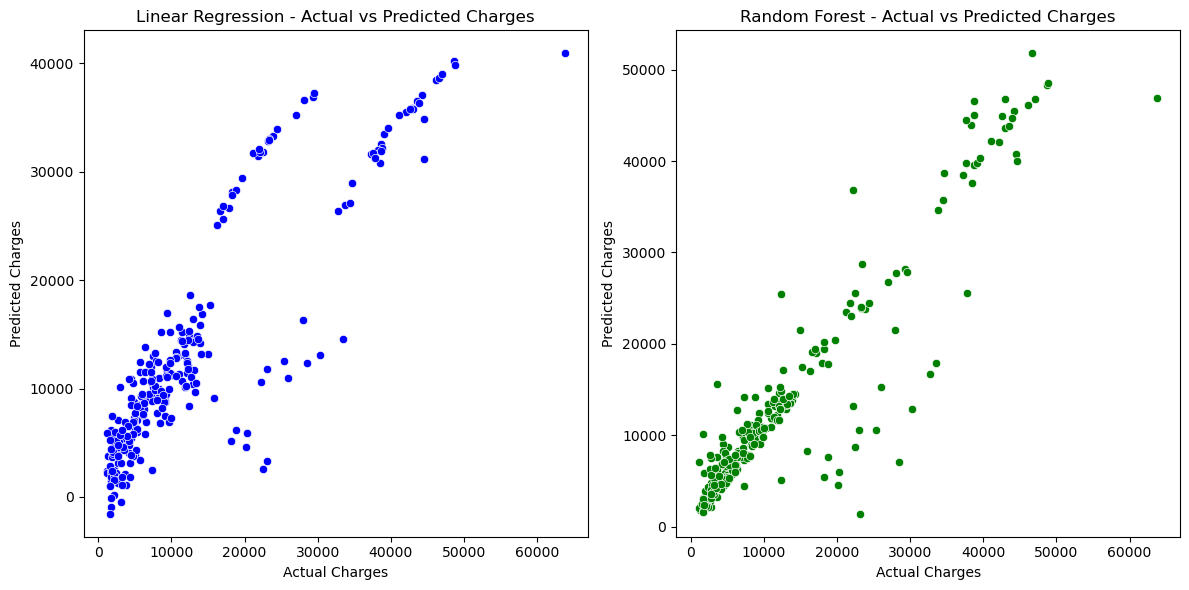

In [17]:
# Visualize the performance
plt.figure(figsize=(12, 6))
# Plot Linear Regression predictions
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue')
plt.title("Linear Regression - Actual vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")

# Plot Random Forest predictions
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')
plt.title("Random Forest - Actual vs Predicted Charges")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")

plt.tight_layout()
plt.show()